# **We Will implement Logistic Regression for binary classification and then extend that for multi-class classification**



In [1]:
#importing the libraries
import numpy as np
import torch
import pandas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

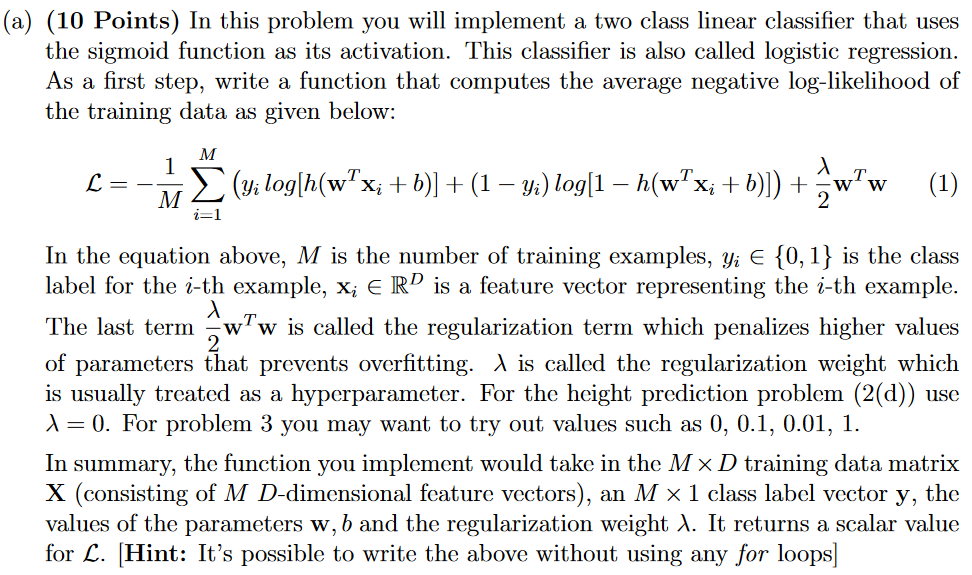

In [64]:
def Loss(X, y, w, b, lamb):
  return -np.mean(y*(np.log(activation(X,w,b))) - (1-y)*np.log(1-activation(X,w,b))) + (lamb / 2 * np.dot(w,w.T)) #Complete Loss Function

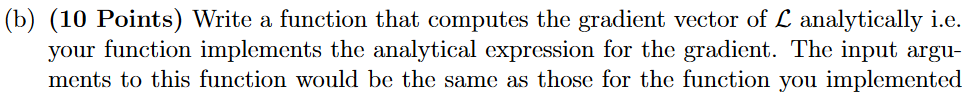
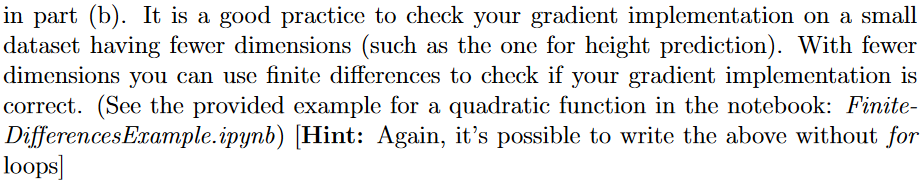

In [74]:
def grad(X, y, w, b, lamb):
  return np.dot((activation(X,w,b) - y),X)+ (lamb * w ), np.sum((activation(X,w,b) - y)) #dw,db

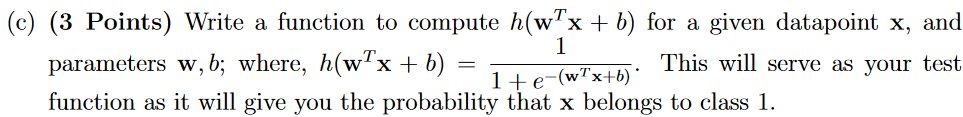

In [38]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
def activation(X,w,b):
  return np.array(sigmoid((np.dot(X,w.T) + b))) 

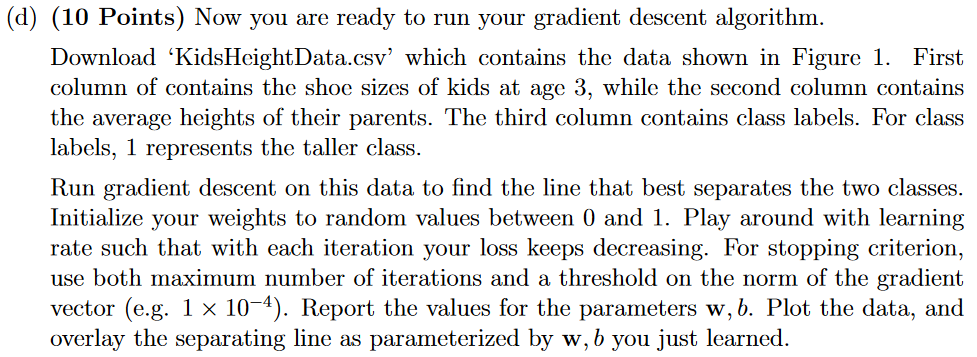

In [72]:
#Train model function
def train(X, y, thresh, epochs, lr, lamb):
    m, n = X.shape
    w = np.random.rand(1,n)
    b = 0
    losses = []
    for epoch in range(epochs):
        for i in range (m):
            x = X[i,0:n].reshape(1,n)
            yelem = y[i].reshape(1,1)
            dw, db = grad(x, yelem, w, b, lamb)
            w -= lr*dw
            b -= lr*db
        l = Loss(X, y, w, b, lamb)
        losses.append(l)
        if(abs(l)<thresh):
          return w, b, losses
          break

    return w, b, losses

# **Below are some handful function which will be used later for calculations**

In [151]:
#Given data, find the predictions for output
def predictions(X,w,b):
    preds = activation(X,w,b)
    pred_class = []
    pred_class = [1 if i >= 0.5 else 0 for i in preds]
    return [np.array(pred_class).reshape(len(pred_class),1),preds]

In [7]:
#Returns accuracy
def accuracy(y, predictions):
    accuracy = np.sum(y == predictions)/ len(y)
    return accuracy * 100

In [149]:
#Plot the data and the line we find to separate the data
def plotSeparatingLine(X, y, w, b):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    fig,ax = plt.subplots(figsize=(10,8))
    positives = np.where(y == 1)
    negatives = np.where(y == 0)
    ax.scatter(X[positives,0], X[positives, 1])
    ax.scatter(X[negatives, 0], X[negatives, 1])
    plt.legend(["Kids who grew up to be >= 2m", "Kids who grew up to be < 2m"])
    ax.set_xlabel("Shoe size at Age 3")
    ax.set_ylabel("Average Height of Parents")
    ax.set_title('Separating Line')
    ax.plot(x1, x2, 'y-')
    ax.grid()

In [9]:
#open data file and read the data
file = open('KidsHeightData.csv', 'rt')
data = pandas.read_csv(file);

In [123]:
#getting features, examples, and labels, examples x features in X and labels in y
X = torch.tensor(data.iloc[:,0:2].values)
y = torch.tensor(data.iloc[:,2].values)
X = X.numpy()
y = y.numpy().reshape(len(y),1)

In [75]:
#Train the model
w, b, l = train(X, y, thresh=1e-6, epochs=1000, lr=0.01, lamb=0)

In [152]:
print('Accuracy is:',accuracy(y, predictions(X,w,b)[0]),'%')
print('Weight and Bias are: ',w,b)

Accuracy is: 93.46733668341709 %
Weight and Bias are:  [[1.59568227 1.91183359]] -16.099265843987673


**OUTPUT**

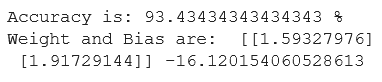

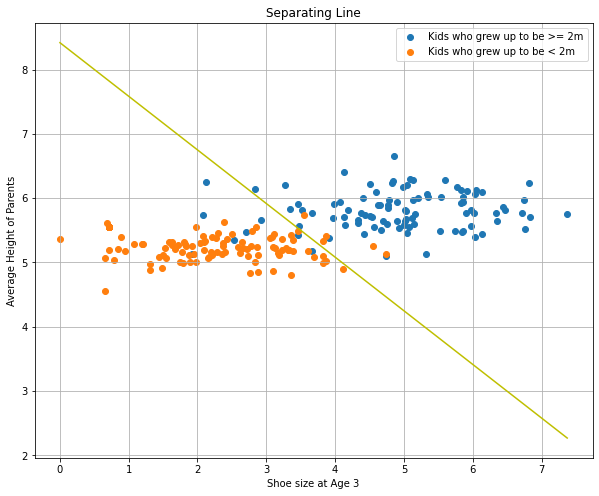

In [150]:
plotSeparatingLine(X,y, w.T, b)